<h1>Neo4J y Python</h1>

<p>Para conectar Neo4J con Python se ha optado por utilizar la librería Py2neo. En primer lugar, se instala mediante el siguiente comando: <br><br>
<b>$ pip install py2neo</b> <br>
El siguiente paso es importar las librerías necesarias para realizar las consultas a Neo4J y para mostrar los datos:<br>
<ul>
    <li>
        <b>py2neo:</b> instalada anteriormente. Es el conector entre Python y Neo4J, las consultas a la base de datos se realizan gracias a él.
    </li>
    <li>
        <b>numpy: </b>necesaria para manejar Arrays en Python entre otras funciones.</li>
    <li>
        <b>pandas: </b>proporciona herramientas para el análisis de datos.
    </li>
    <li>
        <b>matplotlib: </b>utiliza los datos obtenidos para generar diferentes gráficas.
    </li>
</ul>

Se utiliza la función <i>authenticate</i> de Py2neo para especificar el usuario y contraseña necesarios para acceder a la base de datos. Además se genera un objeto Graph, mediante el cual se realizarán las consultas.

</p>

In [46]:
from py2neo import Graph, authenticate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
authenticate("localhost:7474", "neo4j", "1234")
graph = Graph()

<h3>Consulta simple</h3>

Comenzamos con una consulta simple, obtener 20 incidentes que impliquen a un perro. La consulta se hace utilizando el método <i>data</i> del objeto <i>graph</i> que devuelve una lista. A continuación, nos ayudamos de DataFrame que pertenece a la librería <i>pandas</i> para mostrar los datos de una forma mas sencilla y visual.

In [47]:
result = pd.DataFrame(list(graph.data("MATCH (i:Incident) WHERE i.descript CONTAINS 'DOG' RETURN i.incidntNum as Incident, i.descript as Description LIMIT 15")))
result


,Description,Incident
0,"AIDED CASE, DOG BITE",150098630
1,"AIDED CASE, DOG BITE",150113539
2,"AIDED CASE, DOG BITE",150122295
3,"AIDED CASE, DOG BITE",150123817
4,"AIDED CASE, DOG BITE",150132153
5,"AIDED CASE, DOG BITE",150141154
6,"AIDED CASE, DOG BITE",150143984
7,"AIDED CASE, DOG BITE",150150939
8,"AIDED CASE, DOG BITE",150151200
9,"AIDED CASE, DOG BITE",150151266


<h3>Creación de gráficas</h3><br>
En la siguiente consulta se obtiene el número de incidentes que ocurren cada día de la semana ordenados de mayor a menor, de forma que conocemos los días más conflictivos. Se utiliza la función <i>count()</i> de Neo4J para contar el número de accidentes por cada día.

In [48]:
result1= pd.DataFrame(list(graph.data("MATCH (i:Incident)-[:OCURRED_ON]-(d:DayOfWeek) RETURN d.dayOfWeek as DayOfWeek, count(i) as Incidents ORDER BY Incidents DESC")))
result1

,DayOfWeek,Incidents
0,Friday,333229
1,Wednesday,319625
2,Saturday,316115
3,Thursday,311795
4,Tuesday,311106
5,Monday,302540
6,Sunday,290627


Utilizando el ejemplo anterior, se va a generar un gráfico de barras para visualizar los datos utilizando la 
librería <b>matplotlib</b>. Para ello, es necesario separar el resultado de la consulta en dos arrays, uno contiene
los días de la semana y el otro el número de incidentes. El manejo de arrays es posible gracias a la librería 
<b>numpy</b>.

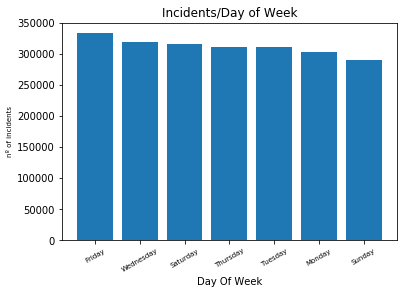

In [50]:
days = result1['DayOfWeek']
incidents = result1['Incidents']

index = np.arange(len(days))
plt.bar(index, incidents)
plt.xlabel('Day Of Week', fontsize=10)
plt.ylabel('nº of incidents', fontsize=7)
plt.xticks(index, days, fontsize=7, rotation=30)
plt.title('Incidents/Day of Week')
plt.show()

<h3>Distritos más conflictivos</h3>

In [51]:
result2 = pd.DataFrame(list(graph.data("MATCH (i:Incident)-[:OCURRED_IN]-(d:District) RETURN d.PdDistrict as District, count(i) as Incidents ORDER BY Incidents DESC LIMIT 5")))
result2



,District,Incidents
0,SOUTHERN,394099
1,MISSION,295781
2,NORTHERN,268877
3,CENTRAL,222253
4,BAYVIEW,218462


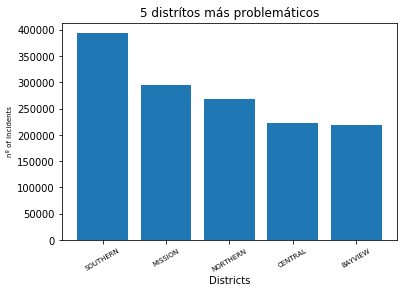

In [52]:
districts = result2['District']
incidents = result2['Incidents']

index = np.arange(len(districts))
plt.bar(index, incidents)
plt.xlabel('Districts', fontsize=10)
plt.ylabel('nº of incidents', fontsize=7)
plt.xticks(index, districts, fontsize=7, rotation=30)
plt.title('5 distrítos más problemáticos')
plt.show()

<h3>Incidentes más comunes</h3>

In [53]:
result3 = pd.DataFrame(list(graph.data("MATCH (i:Incident)-[:BELONGS_TO]-(c:Category) RETURN c.categoryName as Category, count(i) as Incidents ORDER BY Incidents DESC LIMIT 5")))
result3

,Category,Incidents
0,LARCENY/THEFT,526062
1,OTHER OFFENSES,462496
2,NON-CRIMINAL,280029
3,ASSAULT,275567
4,DRUG/NARCOTIC,192184


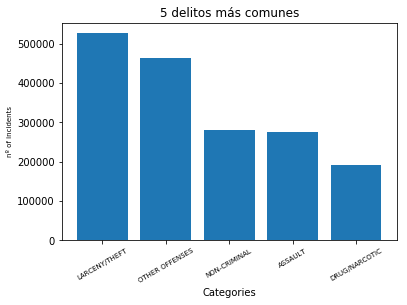

In [38]:
categories = result3['Category']
incidents = result3['Incidents']

index = np.arange(len(categories))
plt.bar(index, incidents)
plt.xlabel('Categories', fontsize=10)
plt.ylabel('nº of incidents', fontsize=7)
plt.xticks(index, categories, fontsize=7, rotation=30)
plt.title('5 delitos más comunes')
plt.show()
